This script creates a bar plot of the results from tflite profiling for the audio model.

Author: Ulrik, s195091 

In [2]:
import pandas as pd
import matplotlib.pyplot as plot

In [3]:
# Load all the profiling outputs from board
df_cpu_def = pd.read_csv('/home/udhansen/nn_models/audio_model/benchmark/board/tflite/benchmark_data_reg/run1000/cpu/default/Summary_by_node_type.csv', skiprows=1, index_col=0, skipinitialspace=True)
df_cpu_num1 = pd.read_csv('/home/udhansen/nn_models/audio_model/benchmark/board/tflite/benchmark_data_reg/run1000/cpu/num1/Summary_by_node_type.csv', skiprows=1, index_col=0, skipinitialspace=True)
df_cpu_num2 = pd.read_csv('/home/udhansen/nn_models/audio_model/benchmark/board/tflite/benchmark_data_reg/run1000/cpu/num2/Summary_by_node_type.csv', skiprows=1, index_col=0, skipinitialspace=True)
df_cpu_num4 = pd.read_csv('/home/udhansen/nn_models/audio_model/benchmark/board/tflite/benchmark_data_reg/run1000/cpu/num4/Summary_by_node_type.csv', skiprows=1, index_col=0, skipinitialspace=True)

df_cpu_def = pd.DataFrame(df_cpu_def.sum()).T
df_cpu_num1 = pd.DataFrame(df_cpu_num1.sum()).T
df_cpu_num2 = pd.DataFrame(df_cpu_num2.sum()).T
df_cpu_num4 = pd.DataFrame(df_cpu_num4.sum()).T

In [4]:
# Load all the profiling outputs from own computer
df_cpu_pc = pd.read_csv('/home/udhansen/nn_models/audio_model/benchmark/own_computer/tflite/benchmark_data_reg/run1000/cpu/default/Summary_by_node_type.csv', skiprows=1, index_col=0, skipinitialspace=True)
df_cpu_num1_pc = pd.read_csv('/home/udhansen/nn_models/audio_model/benchmark/own_computer/tflite/benchmark_data_reg/run1000/cpu/num1/Summary_by_node_type.csv', skiprows=1, index_col=0, skipinitialspace=True)
df_cpu_num2_pc = pd.read_csv('/home/udhansen/nn_models/audio_model/benchmark/own_computer/tflite/benchmark_data_reg/run1000/cpu/num2/Summary_by_node_type.csv', skiprows=1, index_col=0, skipinitialspace=True)
df_cpu_num4_pc = pd.read_csv('/home/udhansen/nn_models/audio_model/benchmark/own_computer/tflite/benchmark_data_reg/run1000/cpu/num4/Summary_by_node_type.csv', skiprows=1, index_col=0, skipinitialspace=True)

df_cpu_pc = pd.DataFrame(df_cpu_pc.sum()).T
df_cpu_num1_pc = pd.DataFrame(df_cpu_num1_pc.sum()).T
df_cpu_num2_pc = pd.DataFrame(df_cpu_num2_pc.sum()).T
df_cpu_num4_pc = pd.DataFrame(df_cpu_num4_pc.sum()).T

In [6]:
# Creates a dataframe with all avg_ms values
df_avgms_data = pd.DataFrame({
    'def': [df_cpu_pc['avg_ms'][0], df_cpu_def['avg_ms'][0]],
    'num: 1': [df_cpu_num1_pc['avg_ms'][0], df_cpu_num1['avg_ms'][0]],
    'num: 2': [df_cpu_num2_pc['avg_ms'][0], df_cpu_num2['avg_ms'][0]],
    'num: 4': [df_cpu_num4_pc['avg_ms'][0], df_cpu_num4['avg_ms'][0]]},
    index = ['cpu (PC)','cpu']
)

# Converting from ms to us
df_avgms_data = df_avgms_data * 1000

print(df_avgms_data)

              def   num: 1   num: 2  num: 4
cpu (PC)   1473.0   1464.0   1379.0  1779.0
cpu       17254.0  17278.0  12210.0  9178.0


Text(0, 0.5, 'Time (us)')

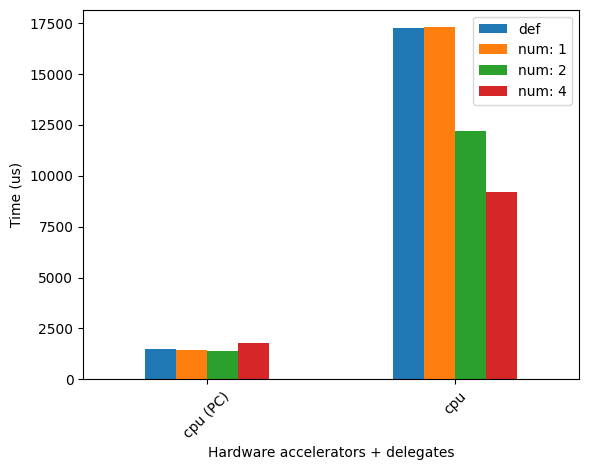

In [7]:
df_avgms_data.plot(kind="bar")
plot.xlabel('Hardware accelerators + delegates')
plot.xticks(rotation=45)
plot.ylabel('Time (us)')